# Matplotlib

![](https://matplotlib.org/stable/_images/history-1.png)

## Matplotlib : Visualization with Python

> **Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.
([matplotlib.org](https://matplotlib.org/stable/index.html))

> **Matplotlib** is a library for making 2D plots of arrays in Python. Although it has its origins in emulating the MATLAB graphics commands, it is independent of MATLAB, and can be used in a Pythonic, object oriented way. Although Matplotlib is written primarily in pure Python, it makes heavy use of NumPy and other extension code to provide good performance even for large arrays.
([matplotlib.org - history](https://matplotlib.org/stable/users/history.html))

> **맷플롯립matplotlib**은 플롯팅을 위한 파이썬 모듈로서, ScientificPython 모듈 모음의 구성요소다.
> 맷플롯립은 그림의 모든 측면을 사용자 정의하기 위한 종합적인 API로, 전문적인 그림을 쉽게 그리게 해준다.
> ([<Matplotlib을 활용한 데이터 시각화 프로그래밍>](https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=51202127))

> **Matplotlib** is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
> It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.
> ([wikipedia](https://en.wikipedia.org/wiki/Matplotlib))

## matplotlib.pyplot

> **matplotlib.pyplot** is a collection of functions that make matplotlib work like MATLAB.
> Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
([matplotlib.org - pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html))

matplotlib을 호출하고자 할 때에는

In [1]:
import matplotlib as mpl

와 같은 명령어를 사용할 수 있을 것이다.
하지만, 가볍게 matplotlib을 사용하는 경우, pyplot이라는 submodule만을 쓰게 된다.
즉 matplotlib은 pyplot과 거의 항상 같이 쓰인다.
따라서, 위의 명령어보다는 아래와 같은 명령어를 주로 사용하게 된다.

In [2]:
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

(git bash 등을 통해)
```
git clone https://github.com/matplotlib/matplotlib
```
을 입력하면 matplotlib 모듈 전체를 다운받을 수 있다.
'lib'폴더 내부의 'matplotlib'폴더에 들어가면 이 matplotlib 모듈의 전체적인 구조를 볼 수 있다.
"pyplot.py" 파일을 실행하면, 그래프를 그리는 데 사용되는 여러 함수들이 어떻게 정의되어있는지 확인할 수 있다.

# 간단한 그래프 그리기

## plt.scatter

**matplotlib.pyplot**(이해 plt)을 사용해 그래프를 그리는 간단한 예시는 다음과 같다.

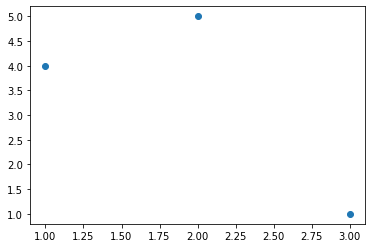

In [3]:
plt.scatter([1,2,3],[4,5,1])
plt.show()

`plt.scatter`에 두 개의 리스트([1,2,3], [4,5,1])를 넣는다.
그러면 matplotlib은 좌표평면 위에 세 점 (1,4), (2,5), (3,1)을 찍은 결과를 보여준다.

다시 말해, 길이가 서로 같은 두 개의 list $X=[x_1,x_2,\cdots,x_n]$, $Y=[y_1,y_2,\cdots,y_n]$를 plt.plot함수에 넣으면 $n$개의 점 $(x_1,y_1)$, $(x_2,y_2)$, $\cdots$, $(x_n,y_n)$이 좌표평면 위에 찍힌다.

## plt.plot

여러 개의 점을 이은 결과를 나타내기 위해서는 `plt.scatter` 대신 `plt.plot`을 사용할 수 있다;

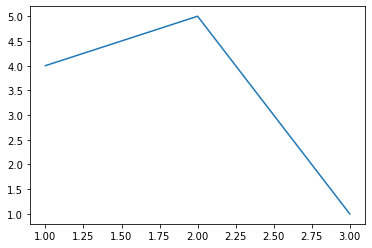

In [4]:
plt.plot([1,2,3],[4,5,1])
plt.show()

plt.plot은 유한 개의 선을 이어주는 역할을 수행하므로, 원칙적으로는 곡선을 나타낼 수는 없다.
하지만, 많은 점들을 사용하면 '마치 곡선처럼' 보이게 할 수 있다.
이때, numpy의 `np.linspace`가 유용하게 사용될 수 있다.

아래 코드는 폐구간 [0,5]에서 $y=x^2$의 그래프이다.

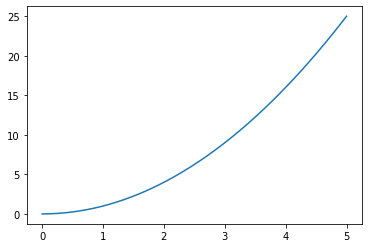

In [5]:
import numpy as np
X = np.linspace(0,5,501)
Y = X**2
plt.plot(X,Y)
plt.show()

## 입력값의 데이터타입

`plt.scatter(X,Y)` 혹은 `plt.plot(X,Y)` 에서, `X`와 `Y`의 데이터타입은 파이썬 리스트 말고도 numpy의 np.array여도 상관없다.
그리고, 파이썬 리스트보다는 np.array형태가 더 권장된다.
다만 `X`와 `Y`가 pandas의 dataframe으로 주어지는 경우에는 결과를 출력하지 못한다.
따라서,  데이터를 np.array 형태로 바꾸어주어야 한다.([matplotlib.org - usage guide - Types of inputs to plotting functions](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

`plt.plot(X,Y)`에서 X는 생략되어 `plt.plot(Y)`로 쓸 수 있다.
이때, X는 np.arange(len(Y))로 정의된다.

`plt.plot(Y)`에서 `Y`가 rank 2 tensor, 즉 matrix인 경우에는 성공적으로 그림을 그리긴 하지만 조금 다른 문법으로 작동한다.

`plt.plot`에 list 두 개가 아닌, 행이 두 개인 np.array object를 넣게되면 list 두 개를 넣었을때와는 다른 모양의 그래프들이 나온다.
`b = np.matrix([[x_11, x_12, x_13],[x_21, x_22, x_23]])`의 $2\times3$ matrix 형태의 np.array object를 넣게되면 세 개의 그래프들이 나오는데 첫번째 그래프는 두 점
$$(0,x_{11}),(1,x_{21})$$
을 이은 것이고 두번재 그래프는 두 점
$$(0,x_{12}),(1,x_{22})$$
을 이은 것이며, 세번째 그래프는 두 점
$$(0,x_{13}),(1,x_{23})$$
을 이은 것이다.

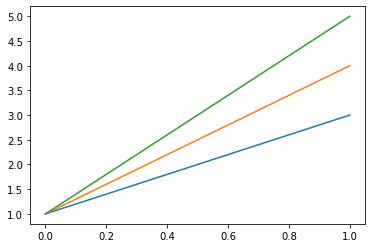

In [6]:
b = np.array([[1, 1, 1], [3, 4, 5]])
plt.plot(b)

따라서, 굳이 행이 두 개인 np.array object가 아니더라도 그래프는 그려진다.
정리하면 $m\times n$ matrix 형태의 np.array object의 경우 $n$개의 그래프가 나타나는데 이 그래프들 각각은 $m$개의 점들을 차례로 이은 것이다.

## 'numpy array' vs 'python list'

아래의 두 예시는 사인함수의 그래프를 두 가지 방식으로 그려본 것이다.
첫번째 방식에서는 numpy를 전혀 사용하지 않은 채로 python의 기본 기능들만 사용했고, 두번째 방식에서는 numpy를 사용했다.
numpy를 사용한 예제의 코드가 훨씬 짧고 직관적임을 확인할 수 있다.

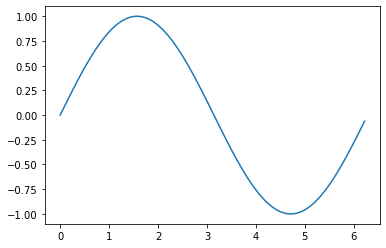

In [7]:
import math
T = range(100)
X = [(2 * math.pi * t) / len(T) for t in T]
Y = [math.sin(value) for value in X]
plt.plot(X,Y)
plt.show()

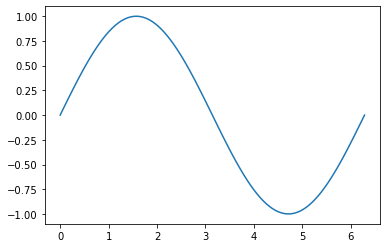

In [8]:
X = np.linspace(0,2*np.pi,100)
Y = np.sin(X)
plt.plot(X,Y)
plt.show()

numpy에서는 리스트를 elementwise하게 곱하거나 더하는 것이 매우 간편하다.
따라서 아래와 같이 다항함수의 그래프를 그릴 때에도, 매우 간단한 코드만으로 원하는 결과를 얻어낼 수 있다.

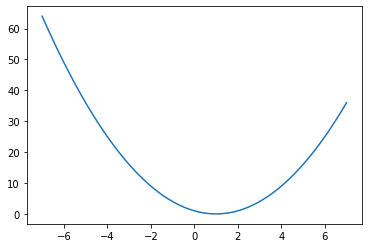

In [9]:
X = np.linspace(-7,7,1000)
Y = X**2-2*X+1.
plt.plot(X,Y)
plt.show()

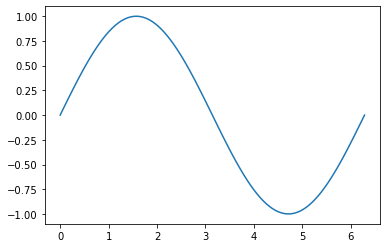

In [10]:
X = np.linspace(0,2*np.pi,100)
Y = np.sin(X)
plt.plot(X,Y)
plt.show()

## _fig_, _ax_ 를 직접 지정하여 그래프 그리기

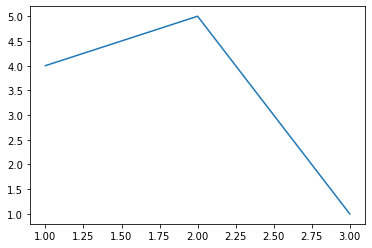

In [11]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1,2,3],[4,5,1])  # Plot some data on the axes.

In [12]:
type(fig)

matplotlib.figure.Figure

In [13]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

# 그래프 꾸미기

그래프를 조금 더 보기좋게 만들 수 있는 여러가지 기능들이 있다.
이에 관해서 소개하고자 한다.
여기 나오는 예시들은 [Youtube : Cirey Chafer - Matplotlib tutorials (10 videos)](https://youtu.be/UO98lJQ3QGI?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_)에서 주로 가져왔다.

## 기본 그래프

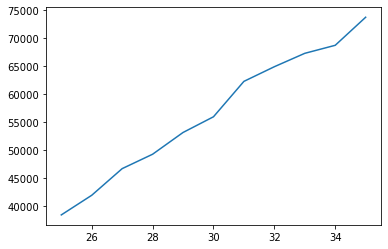

In [14]:
ages = np.linspace(25,35,11)
salary = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
plt.plot(ages,salary)
plt.show()

아무것도 꾸미지 않은 기본 그래프이다.
`ages`를 25부터 34까지의 숫자들을 차례로 나열한 np.array로 정의했고 `salary`는 10개의 서로다른 숫자들로 이루어진 파이썬 리스트로 정의한 후 이 둘을 각각 x좌표, y좌표로 하여 그래프를 그렸다.

##  _title_, _xlabel_, _ylabel_

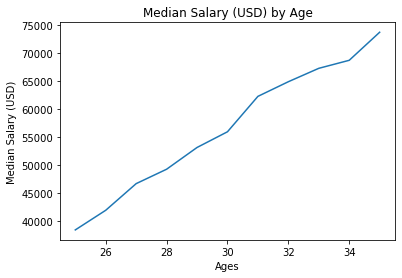

In [15]:
ages = np.linspace(25,35,11)
salary = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
plt.plot(ages,salary)
plt.title('Median Salary (USD) by Age') # 타이틀 추가
plt.xlabel('Ages') # x-label 추가
plt.ylabel('Median Salary (USD)') # y-label 추가
plt.show()

그래프의 제목과 x레이블, y레이블을 지정했다.
이 그래프는 나이에 따른 월급의 중앙값을 표현하는 그래프임을 명시하게 되었다.

## _legend_, _label_

아래 그림은 한 개의 그림(figure)에 (정확히는, 한 개의 'axes'에) 두 개의 그래프를 그린 모습이다.
이를 위해서는 단순히 `plt.show()`이 나타나기 전에 `plt.plot`을 두 번 선언해주면 된다.
두 개의 그래프가 각각 어떤 것을 나타내는지 표시하기 위해서는 범례(legend)를 적을 필요가 있다.
`plt.legend`에 범례로 쓸 문자열을 list의 형태로 넣어주면 범례가 지정된다.

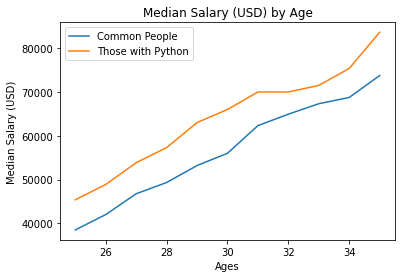

In [16]:
ages = np.linspace(25,35,11)
salary = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
py_salary = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages,salary)
plt.plot(ages,py_salary)
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend(['Common People','Those with Python']) # 범례 지정 방법 1
plt.show()

위의 방법은 어떤 `plt.plot`을 어떤 범례에 대응시킬 것인지 하는 것이 헷갈릴 우려가 있다.
이를 방지하기 위한 방법으로, `plt.plot`을 선언할 때 범례를 특정(label)해줄 수도 있다.
다만, 마지막에 plt.legend를 빈괄호와 함께 넣어주어야 한다.

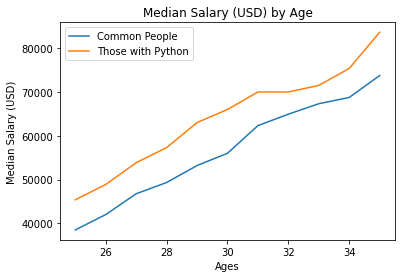

In [17]:
ages = np.linspace(25,35,11)
salary = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
py_salary = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages,salary,label='Common People')  # 범례 지정 방법 2
plt.plot(ages,py_salary,label='Those with Python')  # 범례 지정 방법 2
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

## _marker_, _color_, _linestyle_, _linewidth_

`plt.scatter`와 `plt.plot`를 사용함에 있어서, 표시되는 점의 모양(`marker`), 점과 선의 색상(`color`), 선의 모양(`linestyle`, `ls`)을 원하는 대로 바꿀 수 있다.

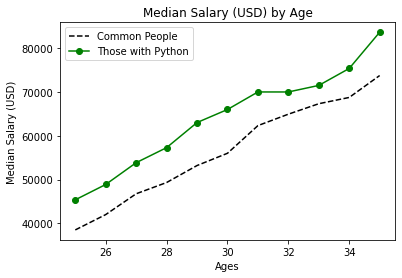

In [18]:
ages = np.linspace(25,35,11)
salary = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
py_salary = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages, salary, 'k--',label='Common People') # color, linestyle 지정
plt.plot(ages, py_salary, 'go-',label='Those with Python') # color, marker, linestyle 지정
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

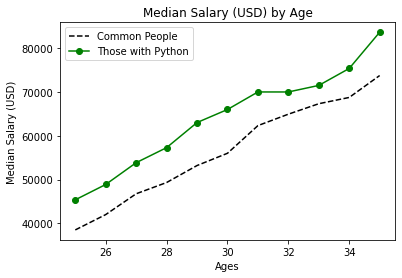

In [19]:
ages = np.linspace(25,35,11)
salary = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
py_salary = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages, salary, color='k', ls='--',label='Common People') # color, linestyle 지정
plt.plot(ages, py_salary, color='g', marker='o',label='Those with Python') # color, marker 지정
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

아래 표는, 사용할 수 있는 `marker`, `linestyle`, `color`의 목록이다.
![](markerlinecolor.png)

비슷한 방식으로 선 굵기(`linewidth`, `ls`)를 정할 수 있다.

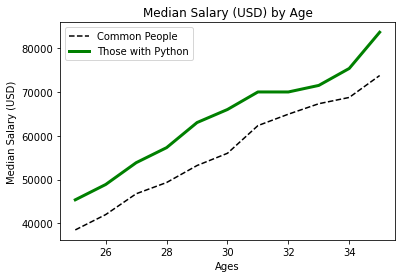

In [20]:
ages = np.linspace(25,35,11)
salary = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
py_salary = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages, salary, color='k', ls='--',label='Common People')
plt.plot(ages, py_salary, color='g', lw=3,label='Those with Python') # linewidth 지정
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.show()

## _grid_

`plt.grid(True)` 명령어를 통해 그래프상에 눈금을 줄 수 있다.

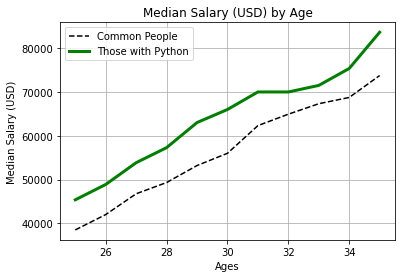

In [21]:
ages = np.linspace(25,35,11)
salary = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
py_salary = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages, salary, color='k', ls='--',label='Common People')
plt.plot(ages, py_salary, color='g', lw=3,label='Those with Python') # linewidth 지정
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.grid(True) # grid 표시
plt.show()

In [22]:
plt.rcParams['figure.figsize']

[6.0, 4.0]

## _style_

이미 지정되어 있는 스타일들을 활용하는 방법도 있다.
사용가능한 스타일을 조회하는 데에는 다음 명령어가 사용될 수 있다.

In [23]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


`plt.style.use(A)`를 사용하면, 앞으로 나올 도표들에 스타일 A를 적용시킨다.

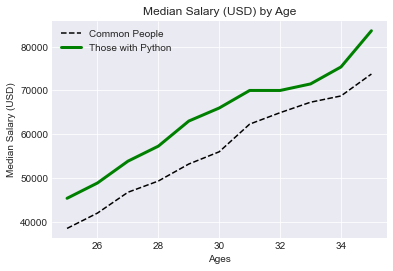

In [24]:
plt.style.use('seaborn-darkgrid') # 스타일 지정
ages = np.linspace(25,35,11)
salary = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
py_salary = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages, salary, color='k', ls='--',label='Common People')
plt.plot(ages, py_salary, color='g', lw=3,label='Those with Python')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.grid(True)
plt.show()

`plt.xkcd()`를 사용하면 특이한 스타일의 그래프를 그릴 수도 있다.

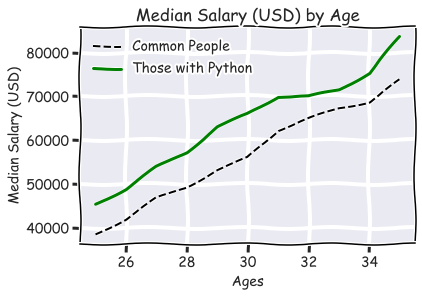

In [25]:
plt.xkcd()
ages = np.linspace(25,35,11)
salary = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]
py_salary = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages, salary, color='k', ls='--',label='Common People')
plt.plot(ages, py_salary, color='g', lw=3,label='Those with Python')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend()
plt.grid(True)
plt.show()

기본 스타일로 복귀하는 명령어는 `plt.style.use(default)`이다.

In [26]:
plt.style.use('default') # 기본 스타일로 복귀

## rcParams

마지막 그림을 보면, 처음에 비해 그래프의 크기가 많이 달라졌다는 것을 알 수 있다.
`matplotlib.pyplot`에는 figure의 각 인자들을 조회할 수 있는 명령어인 `plt.rcParams`가 있다.

In [27]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

그래프의 크기에 해당하는 인자는 `figure.figsize`이다.

In [28]:
plt.rcParams['figure.figsize']

[6.4, 4.8]

예상대로, 처음 figsize값이었던 [6, 4]에 비해 커진 것을 확인할 수 있다.

# subplot, subplots

## subplot

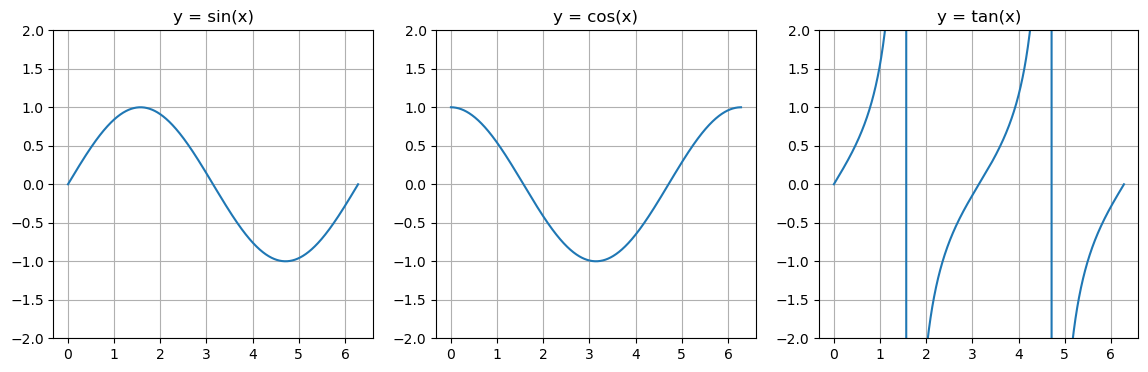

In [29]:
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 

x = np.linspace(0,2*math.pi,1000)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

plt.subplot(131)
plt.ylim(-2, 2)
plt.plot(x,y1)
plt.title('y = sin(x)')

plt.subplot(132)
plt.ylim(-2, 2)
plt.plot(x,y2)
plt.title('y = cos(x)')

plt.subplot(133)
plt.ylim(-2, 2)
plt.plot(x,y3)
plt.title('y = tan(x)')
plt.show()

## subplots

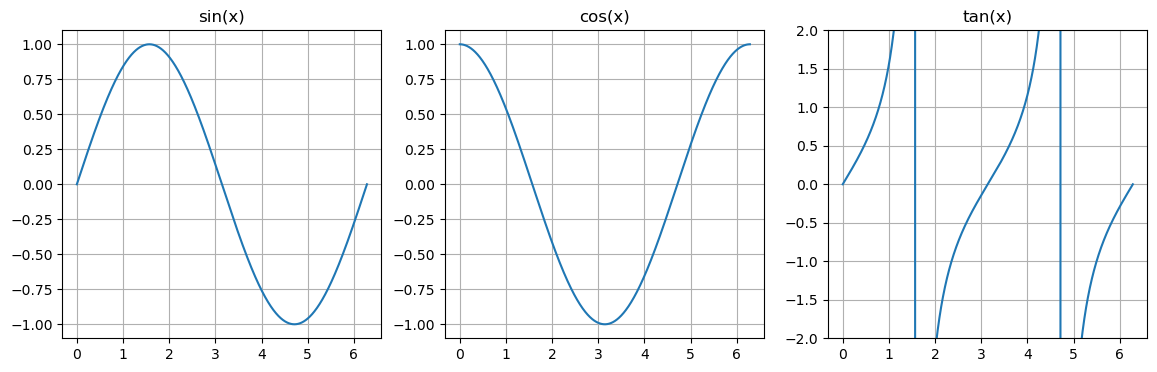

In [30]:
fig, axs = plt.subplots(1,3)

plt.ylim(-2, 2)

axs[0].plot(x,y1)
axs[0].set_title('sin(x)')

axs[1].plot(x,y2)
plt.ylim(-2, 2)
axs[1].set_title('cos(x)')

axs[2].plot(x,y3)
plt.ylim(-2, 2)
axs[2].set_title('tan(x)')

plt.show()

# 참고한 자료들

* 영상
 - [Youtube : Cirey Chafer - Matplotlib tutorials (10 videos)](https://youtu.be/UO98lJQ3QGI?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_)
 - [inflearn : 거친코딩 - Matplotlib & Seaborn 라이브러리를 활용한 데이터 시각화 (5 videos)](https://youtu.be/JOhWjtXxqBQ)
* 읽기자료
 - [wikidocs : matplotlib](https://wikidocs.net/124976)
 - [GeeksforGeeks : matplotlib tutorial](https://www.geeksforgeeks.org/matplotlib-tutorial)
* 책
 - Matplotlib을 활용한 데이터 시각화 프로그래밍(Matplotlib Plotting Cookbook), 알렉상드르 드베르 (Alexandre Devert), 2015, acorn publishing / Packt